# AI06 - TD03 : Incertitude de mesure

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercice 1 

Calcul de la variance : 

$$Var(g(X_1, \dots, X_2)) = \left(\frac{\partial g}{\partial_{X_1}}(x_1^0, \dots, x_n^0) \right)^2Var(X_1) + \dots + \left(\frac{\partial g}{\partial_{X_n}}(x_1^0, \dots, x_n^0) \right)^2Var(X_n)$$

Dans cet exercice : $a = \frac{\sqrt{F_x^2 + F_y^2}}{m}$

Développement: 

$\frac{\partial a}{\partial F_x} = \frac{\partial a}{\partial u}\frac{\partial u}{\partial F_x} = \frac{2F_x}{m*2\sqrt{F_x^2+F_y^2}} = \frac{F_x}{m\sqrt{F_x^2+F_y^2}}$

$\frac{\partial a}{\partial F_y} = \frac{\partial a}{\partial u}\frac{\partial u}{\partial F_y} = \frac{2F_y}{m*2\sqrt{F_x^2+F_y^2}} = \frac{F_y}{m\sqrt{F_x^2+F_y^2}}$

$\frac{\partial a}{\partial m} = -\frac{\sqrt{F_x^2+F_y^2}}{m^2}$

On a donc : 

$$\begin{align*}Var(a) &= \left( \frac{\partial a}{\partial F_x} \right)^2Var(x) + \left( \frac{\partial a}{\partial F_y} \right)^2Var(y) + \left( \frac{\partial a}{\partial m} \right)^2Var(m) \\	   &= \left( \frac{F_x}{m\sqrt{F_x^2+F_y^2}} \right)^2\sigma(x)^2 + \left( \frac{F_y}{m\sqrt{F_x^2+F_y^2}} \right)^2\sigma (y)^2 + \left( -\frac{\sqrt{F_x^2+F_y^2}}{m^2} \right)^2\sigma(m)^2\end{align*}$$



Application numérique :

$\sigma_x = 0.05N \Rightarrow \sigma_x^2 = 0.0025$

$\sigma_y = 0.05N \Rightarrow \sigma_y^2 = 0.0025$

$\frac{\sigma_m}{m} = 0.5\% \Rightarrow \sigma_m = 0.5/100*0.185 = 9.25*10^{-4} \Rightarrow \sigma_m^2 = 8.55625*10^{-7} $








In [65]:
Fx = 0.8
Fy = 1.4
m = 0.185

In [66]:
var_x = 0.05**2
var_y = 0.05**2
var_m = (0.5/100*m)**2

In [67]:
var_a = (Fx/(m*np.sqrt(Fx**2 + Fy**2)))**2*var_x + (Fy/(m*np.sqrt(Fx**2 + Fy**2)))**2*var_y + (-np.sqrt(Fx**2 + Fy**2)/(m**2))**2*var_m
print('Variance de a : {:.4f}'.format(var_a))

Variance de a : 0.0749


In [68]:
sigma_a = np.sqrt(var_a)
print('Ecart-type de a : {:.4f}'.format(sigma_a))

Ecart-type de a : 0.2738


In [69]:
a = np.sqrt(Fx**2 + Fy**2)/m
print('a = {:.4f} +/- {:.4f} m.s^(-2)'.format(a, sigma_a))
print('Invertitude relative : {:2.4%}'.format(sigma_a/a))

a = 8.7160 +/- 0.2738 m.s^(-2)
Invertitude relative : 3.1409%


## Exercice 2

In [70]:
df = pd.DataFrame({
    'x' : [2.02, 2.66, 3.72, 5.73, 8.97, 9.08],
    'y' : [9.29, 10.4, 10.89, 16.27, 22.88, 23.16]
})

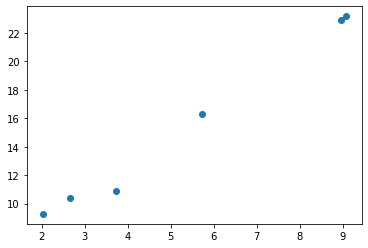

In [77]:
plt.scatter(df.x, df.y)
plt.show()